## **Detect Simple Geometric Shapes**


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("grayscale")

**1. Load and Preprocess the Image**


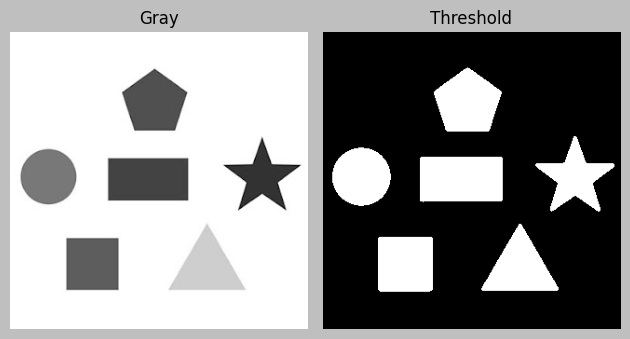

In [5]:
image = cv2.imread("../Data/Images/shapes.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blured = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blured, 240, 255, cv2.THRESH_BINARY_INV)


images = [gray, thresh]
titles = ["Gray", "Threshold"]

plt.figure()
for i in range(len(images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

**2. Find Contours and Detect Shapes**


In [6]:
def detect_shapes(original_img, binary_img):
    contours, _ = cv2.findContours(
        binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue

        cv2.drawContours(original_img, [contour], -1, (0, 255, 0), 2)

        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)

        vertices = len(approx)

        if vertices == 3:
            shape_name = "Triangle"
        elif vertices == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            shape_name = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        elif vertices == 5:
            shape_name = "Pentagon"
        elif vertices > 5:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * area / (perimeter**2)
            shape_name = "Circle" if 0.8 <= circularity <= 1.2 else "Ellipse"
        else:
            shape_name = "Unknown"

        cv2.putText(
            original_img,
            shape_name,
            tuple(approx[0][0]),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 0, 0),
            2,
        )

    cv2.imshow("Detected Shapes", original_img)
    if cv2.waitKey(0) in [ord("q"), 27]:
        cv2.destroyAllWindows()

In [7]:
detect_shapes(image, thresh)